<a href="https://colab.research.google.com/github/sydoky/SciKitLearnPractice/blob/main/SciKitLearnPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [199]:
heart_disease = pd.read_csv("/content/heart-disease.csv")

In [200]:
heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [201]:
#Question 2

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]


In [202]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.20)

In [203]:
X.shape

(303, 13)

In [204]:
X_train.shape

(242, 13)

In [205]:
X_test.shape

(61, 13)

In [206]:
y_train.shape

(242,)

In [207]:
y_test.shape

(61,)

In [208]:
from sklearn.ensemble import RandomForestClassifier 

clf = RandomForestClassifier()

#instance = object. The same thing. We are making an object of our model. We are doing it as a short cut. We will use it later 

In [209]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [210]:
y_preds = clf.predict(X_test) #making prediction based on X_test

In [211]:
clf.score(X_train, y_train) #getting 100% accuracy because X_train and y_train were used to train the model already (Pavel's example 5+6=11) 

1.0

In [212]:
clf.score(X_test, y_test) #X_test, y_test are new and they haven't been used yet 

0.8524590163934426

In [213]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
 


In [214]:
#In this cell making "models" which can be used to apply all models as one be calling "modles" 
example_dict = {"RandomForestClassifier": RandomForestClassifier()} #because we may apply both example_dict and models

models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier()}
results = {} #in result we will store our models results

In [215]:
#This cell is just an EXAMPLE! We are not going to use it. 
example_results = {}
for model_name, model in example_dict.items():
  model.fit(X_train, y_train)
  example_results[model_name] = model.score(X_test, y_test)

example_results





{'RandomForestClassifier': 0.8688524590163934}

In [216]:
np.random.seed(42)
for model_name, model in models.items():
  model.fit(X_train, y_train)
  results[model_name] = model.score(X_test, y_test)

results

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6885245901639344,
 'LinearSVC': 0.5901639344262295,
 'LogisticRegression': 0.8852459016393442,
 'RandomForestClassifier': 0.8360655737704918,
 'SVC': 0.7049180327868853}

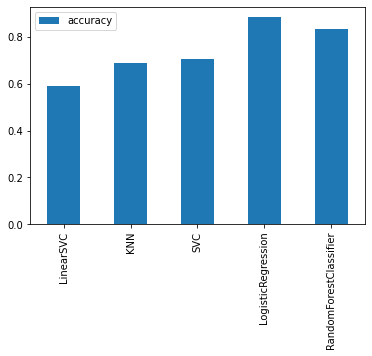

In [217]:
results_df = pd.DataFrame(results.values(),
                          results.keys(),
                          columns=["accuracy"])

results_df.plot.bar();

In [218]:
results_df

,accuracy
LinearSVC,0.590164
KNN,0.688525
SVC,0.704918
LogisticRegression,0.885246
RandomForestClassifier,0.836066


In [219]:
log_reg_grid = {"C": np.logspace(-4, 4, 20), #making a grid over some hyperparameters like "C" and "solver"
                "solver": ["liblinear"]} 
#using hyperparameters will boost my model. I should I know which parameters are the best and provide the best accuracy

In [220]:
np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV

rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv=5,
                                n_iter = 5,
                                verbose = True)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=5, n_jobs=None,
                   param_distributions={'C': a...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+

In [221]:
np.logspace(-4, 4, 20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [222]:
#Now we are going to find out the best parameters/hyperparmeters 
rs_log_reg.best_params_
#this cell will show the best parameter from cell 48 that is above(48cell comes from 45cell)


{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [223]:
rs_log_reg.score(X_test, y_test) #here we are getting the best accuracty from LogisticRegression (44cell)

0.8852459016393442

In [224]:
clf = LogisticRegression(C=0.23357214690901212, solver="liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [225]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [226]:
y_preds = clf.predict(X_test)

In [227]:
clf.score(X_test, y_test)

0.8852459016393442

In [228]:
y_preds #this is my prediction 

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [229]:
confusion_matrix(y_test, y_preds) #y_test is the original answer and y_preds is the prediction based on my X_test 

array([[25,  4],
       [ 3, 29]])

In [230]:
import seaborn as sns

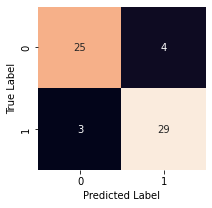

In [231]:
#create a more visual confusion matrix 
def plot_conf_mat(y_test, y_preds):
  fig, ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                   cbar=False)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")

plot_conf_mat(y_test, y_preds)

In [232]:
#create a classification report 
classification_report(y_test, y_preds)

'              precision    recall  f1-score   support\n\n           0       0.89      0.86      0.88        29\n           1       0.88      0.91      0.89        32\n\n    accuracy                           0.89        61\n   macro avg       0.89      0.88      0.88        61\nweighted avg       0.89      0.89      0.89        61\n'

In [233]:
precision_score(y_test, y_preds)

0.8787878787878788

In [234]:
#find the recall score
recall_score(y_test, y_preds)

0.90625

In [235]:
f1_score(y_test, y_preds)

0.8923076923076922

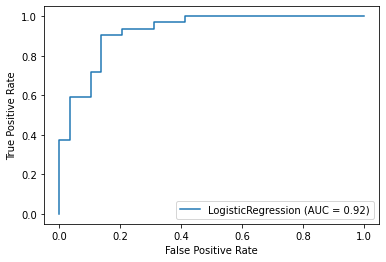

In [236]:
#Plot a ROC curve 
plot_roc_curve(clf, X_test, y_test) #I am using X_test, y_test because I am trying to predict 

In [237]:
from sklearn.model_selection import cross_val_score

In [238]:
cross_val_score(clf,
                X,
                y,
                scoring="accuracy",
                cv=5)

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [239]:
cross_val_acc = np.mean(cross_val_score(clf,
                                          X,
                                          y,
                                          scoring="accuracy",
                                          cv=5))
cross_val_acc
#this cell gives me an average score from cell 48

0.8479781420765027

In [240]:
precision_score = np.mean(cross_val_score(clf,
                          X,
                          y,
                          scoring="precision",
                          cv=5))
precision_score

0.8215873015873015

In [241]:
recall_score = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       scoring="recall",
                                       cv=5))
recall_score

0.9272727272727274

In [242]:
f1_score = np.mean(cross_val_score(clf,
                                   X,
                                   y,
                                   scoring="f1",
                                   cv=5))
f1_score

0.8705403543192143

In [243]:
from joblib import dump, load

In [244]:
#Use the dump function to export the trained model to file 

dump(clf,"training_classifier.joblib") #dumb will save my module

['training_classifier.joblib']

In [245]:
load_clf = load("training_classifier.joblib") #once I saved it in dump, I will need to load it. This is what this line for

load_clf.score(X_test, y_test)

0.8852459016393442

In [246]:
car_sales1 = pd.read_csv("/content/car-sales-extended-missing-data.csv")

car_sales1.head(5)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [247]:
car_sales1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [248]:
car_sales1.isna().sum() #missing values in rows 

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [249]:
car_sales1.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [250]:
#this cell won't work because we have non_numerilan and missing data (Nan). We need numerical values 
# from sklearn.ensemble import RandomForestRegressor
# car_sales_X, car_sales_y = car_sales.drop("Price", axis=1), car_sales.Price
# rf_regressor = RandomForestRegressor().fit(car_sales_X, car_sales_y)

In [251]:
#Remove rows with no labels(NaN's in the Price column)
car_sales1.dropna(subset=["Price"], inplace=True) #inplace=True will not display the graph

In [252]:
#module is pipeline and then importing Pipeline library 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [253]:
categorical_features = ["Make", "Colour"]

categorical_transformer = Pipeline(steps=[("imputer",SimpleImputer(strategy="constant", fill_value="missing")),
                                   ("onehot", OneHotEncoder(handle_unknown="ignore"))])

In [254]:
door_feature = ["Doors"]

door_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value=4))])

In [255]:
numeric_feature = ["Odometer (KM)"]



numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])

In [256]:
preprocessor = ColumnTransformer(
    transformers = [("cat", categorical_transformer, categorical_features), #categorical_features that I created in cell 68
                    ("door", door_transformer, door_feature),
                    ("num", numeric_transformer, numeric_feature)])

In [257]:
car_sales1.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [258]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [259]:
regression_models = {"Ridge": Ridge(),
                     "SVR_linear": SVR(kernel="linear"),
                     "SVR_rbf": SVR(kernel="rbf"),
                     "RandomForestRegressor": RandomForestRegressor()}

regression_results = {}

In [260]:
car_sales_X = car_sales1.drop("Price", axis=1)

car_sales_y = car_sales1["Price"]

In [261]:
car_X_train, car_X_test, car_y_train, car_y_test = train_test_split(car_sales_X,
                                                                    car_sales_y,
                                                                    test_size=0.20,
                                                                    random_state=42)

car_X_train.shape, car_X_test.shape, car_y_train.shape, car_y_test.shape #there is only one column in (800,) and (200,) , the target one 

((760, 4), (190, 4), (760,), (190,))

In [262]:
car_X_train.isna().sum()

Make             35
Colour           38
Odometer (KM)    36
Doors            38
dtype: int64

In [263]:
car_X_train

,Make,Colour,Odometer (KM),Doors
986,Honda,White,71934.0,4.0
297,Toyota,Red,162665.0,4.0
566,Honda,White,42844.0,4.0
282,Honda,White,195829.0,4.0
109,Honda,Blue,219217.0,4.0
...,...,...,...,...
106,Toyota,NaN,218803.0,4.0
277,BMW,Blue,245427.0,5.0
904,Toyota,White,196225.0,4.0
450,Honda,Blue,133117.0,NaN


In [264]:
regression_models

{'RandomForestRegressor': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False),
 'Ridge': Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001),
 'SVR_linear': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
     kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
 'SVR_rbf': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
     kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=F

In [265]:
for model_name, model in regression_models.items():
  model_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                            ("model", model)])
  print(f"Fitting {model_name}...")
  model_pipeline.fit(car_X_train, car_y_train)


  print(f"Scoring {model_name}...")
  regression_results[model_name] = model_pipeline.score(car_X_test, car_y_test)

Fitting Ridge...
Scoring Ridge...
Fitting SVR_linear...
Scoring SVR_linear...
Fitting SVR_rbf...
Scoring SVR_rbf...
Fitting RandomForestRegressor...
Scoring RandomForestRegressor...


In [266]:
print(regression_results) #be default I get score() in this cell

{'Ridge': 0.25387554878315055, 'SVR_linear': 0.08555518343236379, 'SVR_rbf': 0.0018786027505235392, 'RandomForestRegressor': 0.2238638294084273}


In [275]:
#Importing those to find out the difference between model prediction and actual answer 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [276]:
ridge_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                 ("model", Ridge())])

ridge_pipeline.fit(car_X_train,car_y_train)

car_y_preds = ridge_pipeline.predict(car_X_test)

In [279]:
mse = mean_squared_error(car_y_test, car_y_preds) #here I am not predicting but I am comparing 
mse
#it's a squared value, it is why the number looks rediculous

49960264.20503396

In [280]:
mae = mean_absolute_error(car_y_test, car_y_preds)
mae

5714.468592363155

In [281]:
r2 = r2_score(car_y_test, car_y_preds)
r2

0.25387554878315055